## **<font color = blue>1. What is Machine Learning?</font>**

<font color = red>"**Machine Learning in simple words is the process of learning from the current data and implementing scenarios for the future by running some algorithms.**"</font>
So by learning I mean, analysing the patterns from the current data to predict the outcome for the future data.     

## **<font color = blue>2. What are the types of Machine Learning?</font>**

Machine Learning has 3 types namely:
    
1. Supervised Machine Learning. **(E.g. Linear Regression, Logistic Regression, KNN, Support vector Machine, Decision tree algorithm)**
                                     
    
2. Unsupervised Machine Learning. **(E.g. K-means Clustering, Hierarchical Clustering)**

    
3. Reinforcement Machine Learning. **(E.g. Time series analysis (using Exponential smoothing & ARIMA))**

## **<font color = blue>3. Define Supervised Machine Learning</font>**

In Supervised ML, we have independent variables (x) and dependent variable (y).These variables are columns from the data. 
So to put it briefly we have independent & dependent columns in data. 

We can have mutliple independent columns 'x' but there should be only 1 dependent column 'y'.

Supervised Machine Learning come with 2 types: **Classification** & **Regression**

In Classification Supervised ML,
**Based on certain value of  if one is predicting the category(class) of the value in future, it is Classified ML**.
        
In Regression Supervised ML,
**Based on certain value if one is predicting the value in future, it is Regression ML**.


## **<font color = blue>4. Define Unsupervised Machine Learning</font>**

In Unsupervised ML for Clustering we don't have dependent variable 'y' and we group the data based on 
independent variables 'x'. 
**Clustering is basically grouping of data.**

## **<font color = blue>5. Define Reinforcement Machine Learning</font>**

In Reinforced ML,one forecasts the future data of the column (attribute) based on the
past data of the same column (attribute). Here we have just a dependent variable column 'y'.

## **<font color = blue>6. Machine Learning process flow</font>**

This is the Machine Learning flow we are going to follow for almost all the algorithms, so do keep a note of this:

1. Get data: Get data from different sources


2. Clean, prepare & manipulate data: 

a. Handling Null values and outliers.
     
b. Feature selection/variable selection based on domain knowledge.(In other words, by using Correlation try to 
        remove columns that are not essential).
     
c. Converting categorical data to Numerical 
     
d. Scaling the data
          

3. EDA (Exploratory Data Analysis): Generating reports and graphs.



4. Splitting the data: Creating train and test data.



5. Build a model using train data (which is 70-80% of the whole data)



6. Evaluation/Test model: Test model using the test data (20 -30% of the whole data)



7. Optimise the model to increase it's accuracy (Tuning).



**The steps from 'Get data' till 'Splitting the data' are same for all ML algorithms. This is what we define as Preprocessing 
of 
data.**

'Training the model' (step 5) onwards steps may vary depending on the ML algorithm used.

---------------------------------------------------------------------------------------------------------------------------

Now that you have got an overview of Machine Learning, let us start with our first Machine Learning algorithm: **'Linear Regression'**.

# <font color = red>Linear Regression</font>

## <font color = green>The concept of Linear Regression</font>

Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as y) 
and one or more independent variables (x). The relationship between the dependent variable and the independent variable(s)
is assumed to be linear, meaning that the change in the dependent variable is proportional to changes in the independent
variable(s).


The equation used in Linear Regression is

    y = b0 + b1x1 + b2x2 + b3x3 ......bnxn
    
Here b0 = y-intercept: value of y at x=0, where b0, b1 & b2 are co-efficents of linear regression.
Here x1, x2, x3....= independent variables & y = dependent variable

So here using the past data we already have y and x. This by applying Linear regression can help us find
**b0, b1 & b2 (coefficients of linear regression)** 

Using these coefficents for a given values of x, we can then predict the value of y in future!

Linear Regression works on the concept of "Best-fit-line".
**Best-fit-line is the line that pass closest to all the datapoints in the X-Y co-ordinate system. (Similar to Trendline)**.
So equation of this best fit line is nothing but the equation of linear regression above:

     y = b0 + b1x1 + b2x2 + b3x3 ......bnxn
     
With the help of this best-fit-line one can predict y for any given value of x.

To check which particular independent variable (x1, x2,x3...xn) impacts the dependent variable(y) more, we need to 
check which coefficient obtained after LinearRegression has the highest value. **Higher the coefficient more the impact.**

Evaluation of a Regression model is done using Root Mean Square Error (RMSE) & R squared. **Lesser the RMSE better is the 
model.**

    Root Mean Square Error = Actual Value - Predicted value 
    
So one can also infer that lesser RMSE infers to lesser error and hence more enhanced model.
**To define a RMSE, it is a measure of the goodness of fit of LinearRegression model.**


**R squared tells you how well the regression model is in prediction as compared to the mean model.**
It lies between (0-1).

If R squared is close to 1 → very good model.

If R squared is close to 0.5 → Needs tuning.

If R squared is close to 0 → Not a good model.

If R squared is less than 0 → Mean model is better than the regression model.

Let us start with the actual code implementation to understand all these concepts clearly.

# Code 

Problem statement: We would be working on 'advertising.csv' dataset. The dataset is about TV, Radio & Newspaper revenue and
the overall sales of broadcasting media. Our job here is to figure out which particular segment impacts the Sales more.

## <font color = blue>1. Import all the libraries & read the dataset</font>


Let us import the necessary libraries and read the dataset first.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv("advertising.csv")

In [26]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


As I have mentioned earlier we can clearly see the dataset tells us about segment wise revenue distribution and the 
actual Sales.

## <font color = blue>2. Assumption checking<font>

Now before applying Linear regression we have to preprocess the data. The first thing we need to do is to check
for Assumptions. This means we have to check the data for Linearity, multi colinearity, autocorrelation, outliers, null
values and categorical columns.

There are some rules we need to follow for Assumption checking & they are as follows:

**Linearity**              : Independent variable (x) & dependent variable (Y) should have a linear relation.
                             Can be checked using Correlation either by heatmap/scatter plot.
    
**No multi colinearity**   : There should NOT exist a linear realtion between the independent columns (x). In such 
                             cases,one has to drop one of those columns.
    
**No auto correlation**    : Auto correlation means if the values in a column are dependent on their previous values 
                             from the same column, in such case the coulmn is auto-correlated. No Auto-correlation for
                             any  column should exist.(Only time-series data is auto correlated)
        
**No outliers**            : Outliers are the extreme values in the dataset that skew away from the original datapoints.No
                             outliers should be present. Outliers can be identified using boxplot. 

**No null values**         : Dataset should not contain null values. 

**No Categorical columns** : If the dataset have categorical columns convert it to numerical data
                             (only applies when we have categorical columns.)

### <font color = red>2.1 Assumption checking for Linearity, Multi colinearity & Auto correlation<font>

To check for Linearity, Multi colinearity and Auto correlation we use heatmap from seaborn (sns) library.
'data.corr()' will check for correlation on 'data' and annot=True will annotate(display) the correlation values on the plot.

<Axes: >

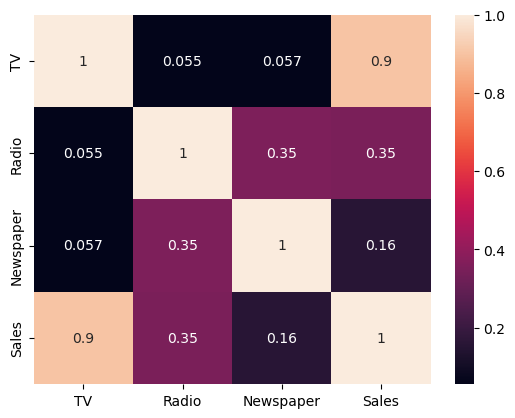

In [27]:
sns.heatmap(data.corr(),annot=True)

The threshold for linear correlation = 0.1

The relation in heatmap below 0.1 is NOT correlated

The relation in heatmap above 0.1 is linearly correlated

The relation in heatmap = 0 is NOT correlated

In the boxplot above, 

Independent col : Newspaper, Radio, TV.

Dependent col : Sales

So in the plot above, the correlation of Sales wrt to Newspaper, Radio & TV are 0.16,0.35 & 0.9 (leftmost col in 
the boxplot) and all of them are greater than 0.1 hence **there exists linearity and correlation.** Linearity verified.

Now let us check for 'Multi correlation',(look at 1st 3 cols in the plot above) the correlation between Newspaper
& TV for one scenario is 0.057 > 0.1. Hence **there exists Multi correlation b/w Newspaper & TV**.However, one should not
eliminate the columns since we have lack of columns. This is called Feature selection/variable selection. 

Also since the values in every independent coulmn above are not anyhow correlated to their previous value we have **no 
autocorrelation** as well.(Only time-series data is auto correlated)

### <font color = red>2.2 Assumption checking for Outliers<font>

We use boxplot from matplotlib library to check for outliers. The syntax is 'plt.boxplot()':

{'whiskers': [<matplotlib.lines.Line2D at 0x26aa1b36410>,
 'caps': [<matplotlib.lines.Line2D at 0x26aa1b37910>,
 'boxes': [<matplotlib.lines.Line2D at 0x26aa1b35750>,
 'medians': [<matplotlib.lines.Line2D at 0x26aa1b44dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26aa1b28bd0>,
 'means': []}

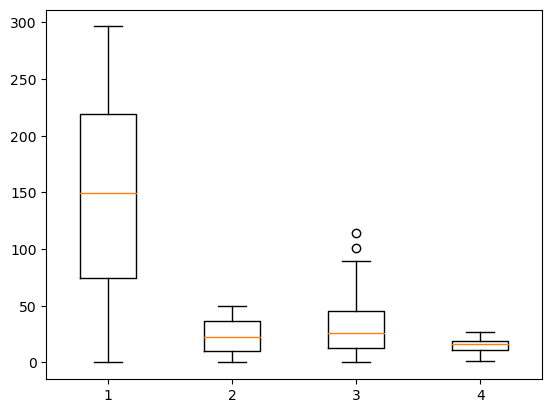

In [28]:
plt.boxplot(data)

The two cirular co-ordinates for column 3 (Newspaper) are the Outliers. We are getting outliers for data in column 
3 above 90. So let us consider only the values below 90 to eliminate the Outliers. 
I am making a new variable 'data_new' where I am storing these changes.

In [29]:
# Fetching data below 90 so that we exclude the outlier in Newspaper column & storing in a new varialble data_new.
data_new = data[data["Newspaper"]< 90]    

In [30]:
data_new

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Let us check for the boxplot now ,

{'whiskers': [<matplotlib.lines.Line2D at 0x26aa1d11650>,
 'caps': [<matplotlib.lines.Line2D at 0x26aa1d1fa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x26aa1d1dd90>,
 'medians': [<matplotlib.lines.Line2D at 0x26aa1d31210>,
 'fliers': [<matplotlib.lines.Line2D at 0x26a9dc71c50>,
 'means': []}

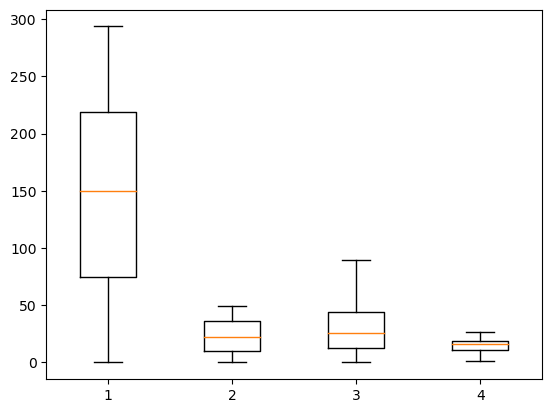

In [31]:
plt.boxplot(data_new)

### <font color = red>2.3 Assumption checking for Null values<font>

To check for null values we use '.isnull().sum()' on data_new. This will return us the sum of null values in all the 
columns.

In [32]:
data_new.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

As we have got No null values from above, we have no need to do Null Value treatment on data_new.
However, if we have got some null values, we can call the following 'Null_Value_Treatment' function where we 
replace integer and float columns having null values with mean and rest other coulmns having null values with mode.

### <font color = red>2.4 Null value treatment<font>

In [33]:
def Null_Value_Treatment(data_new):
    for i in data_new.columns:
        if data_new[i].dtypes == "int64" or data_new[i].dtypes == "float64":
            data_new[i].fillna(data_new[i].mean(),inplace=True)
        else:
            data_new[i].fillna(data_new[i].mode()[0],inplace=True)
    return data_new.isnull().sum()

In [34]:
Null_Value_Treatment(data_new)

C:\Users\ninad\AppData\Local\Temp\ipykernel_9200\871628973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[i].fillna(data_new[i].mean(),inplace=True)


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

So in the code above we are defining a function 'Null_Value_Treatment' where we are checking dtypes (datatypes) of 
individual columns and if the dtypes are integer(int64) or float (float64) we are replacing the null values in data_new
with mean, else for other data types we are replacing the
null values with mode. To call the function, we use Null_Value_Treatment(function_name) aka
Null_Value_Treatment(data_new).

### <font color = red>2.5 Assumption check for Special characters<font>

Even if we have checked for Null values there might be some special characters like '?' in the dataset. To eliminate
them we do the check for speacial characters.

In this check, we use a for loop to assess every column of data_new and use unique() method on every element i of data_new
(given as data_new[i].unique()) to extract the unique characters. 
f"" is called as f-string which is used to make the output dynamic for every column.

In [36]:
# Check for special characters 

for i in data_new.columns:
    print(f"Unique value for coulmn: {i}\n\n{data_new[i].unique()}\n") 

Unique value for coulmn: TV

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4 281.4  69.2 147.3 218.4 237.4  13.2 228.3  62.3
 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7 266.9
  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9 227.2
  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5 261.3
 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4 213.4
  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2  76.3
 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7 135.2
 222.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8 241.7 175.7
 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1 229.5  87.2
   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3  25.6 273.7
  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7 280.7 121.
 171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 117.2
 234.5  17.9 206.8 215.

So here we can infer that we have no special characters (like '?') as well. 
Thus we have checked for both Null value & Special characters.


## <font color = blue>3. Splitting the data<font>

Right before training the data, we have to first split it into 'x' & 'y'. Here 'x' represents all the dependent variables
in the column while 'y' represents the independent variable. 

In [37]:
#While assigning multiple columns we use mutiple brackets

x = data_new[["TV","Radio","Newspaper"]]    
                                        
y = data_new[["Sales"]]

In [38]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


After splitting we got all the dependent columns in 'x'

In [39]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


After splitting we got the independent column in 'y'

Let us check the dimensions of x,y and data_new

In [40]:
#Indicates 3 columns, 198 rows in x for the given example
x.shape 

(198, 3)

In [41]:
#Indicates 1 column, 198 rows in y for the given example
y.shape  

(198, 1)

In [42]:
#Indicates 4 columns, 198 rows in data_new for the given example
data_new.shape

(198, 4)

## <font color = blue>4. Performing Train-Test split<font>

To train the data & to predict the data, Train-test split is the most important part. 

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size = 0.2) 

Here we are using 'sklearn' library which is using another sub library 'model_selection' to import 
a splitting fn 'train_test_split' which splits the independent variable 'x' & dependent variable 'y' into train 
and test sizes based on the ratio 70-80 % for train size of each and 20 % (0.2) for the test size.

**<font color= red>Train data is the data on which the algorithm is trained & test data is the data on which prediction is
done</font>**

Let is check the dimensions of train and test data for 'x' & 'y'

In [44]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)

(158, 1)
(40, 1)


Now if you compare the row wise split with the original shape of x and y, we have 

x.shape = 198 splitted in x_train = 158, x_test = 40

y.shape = 198 splitted in y_train = 158, y_test = 40

## <font color = blue>5. Training the data<font>

Once done with splitting the data, we have to train the data. For training, we use Linear Regression on the trained data 
using fit function. But before that we need to call LinearRegression function by importing it from sklearn.linear_model 
library.

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [46]:
lm.fit(x_train,y_train)

LinearRegression()

The equation that runs on the backend is:
    
**y = b0 + b1x1 + b2x2 + b3x3** 

### <font color = gray>5.1 Printing the value of coefficients<font>

In [47]:
print(lm.coef_)    

[[0.05554508 0.10815448 0.00303242]]


Here lm.coef will return all the coefficients (b1, b2 & b3) 
that we obtain after performing LinearRegression using LinearRegression()

**<font color = red>Here the value of coefficient b2=0.10815448 is higher than the other coefficients.
From this we can conclude that higher b2 corresponds to larger impact on y.
Hence for the above example, investment in advertising for Radio will give us higher return at Sales.</font>**

### <font color = gray>5.2 Printing the value of intercept<font>

In [48]:
print(lm.intercept_)  

[4.37036148]


lm.intercept returns the value of y-intercept (b0)

## <font color = blue>6. Predicting 'y_pred' on 'x_test' data<font>

Prediction is always done on the test data. I am using lm.predict() to predict 'y' on test data of 'x'.

In [50]:
y_pred= lm.predict(x_test)

In [51]:
y_pred

array([[19.29246865],
       [ 7.93262851],
       [10.53174201],
       [20.56436848],
       [11.18293236],
       [ 6.93420255],
       [10.32511476],
       [11.22935069],
       [18.29328886],
       [15.75807389],
       [10.48674116],
       [15.22708497],
       [ 5.86499473],
       [19.68763321],
       [19.42147888],
       [20.98652551],
       [17.45450689],
       [17.9706393 ],
       [16.55395401],
       [17.90912919],
       [ 9.21153789],
       [21.57741257],
       [18.12590974],
       [15.51488824],
       [19.5449591 ],
       [10.02254772],
       [ 5.21889381],
       [22.240137  ],
       [ 9.49443533],
       [22.47350476],
       [ 6.9736208 ],
       [10.30652239],
       [21.91621594],
       [12.16222485],
       [21.49558297],
       [20.98237461],
       [ 9.75027798],
       [14.06250567],
       [19.40488618],
       [10.62981435]])

Now we have obtained 'y_pred' which is a predicted output on the test data. 
Let us try to put this 'y_pred' as 'predicted sales' next to the actual sales (y_test) by constructing a dataframe. 

## <font color = blue>7. Constructing a Dataframe<font>

The syntax to construct a dataframe using pandas is pd.Dataframe(). Dataframe is basically a table.
Now we are creating a dataframe where first input is test data from 'x'.
second input is test data from 'y'
and lastly we are using 'y_pred' from the prediction above.

In [52]:
# DataFrame is used for constructing a table 

new_df = pd.DataFrame()
new_df = x_test
new_df['actual sales']= y_test
new_df['predicted sales']= y_pred
new_df

,TV,Radio,Newspaper,actual sales,predicted sales
59,210.7,29.5,9.3,18.4,19.292469
78,5.4,29.9,9.4,5.3,7.932629
46,89.7,9.9,35.7,10.6,10.531742
68,237.4,27.5,11.0,18.9,20.564368
6,57.5,32.8,23.5,11.8,11.182932
195,38.2,3.7,13.8,7.6,6.934203
140,73.4,17.0,12.9,10.9,10.325115
1,44.5,39.3,45.1,10.4,11.229351
153,171.3,39.7,37.7,16.0,18.293289
4,180.8,10.8,58.4,17.9,15.758074


## <font color = blue>8. Evaluating Root Mean Square Error and R squared<font>

Evaluation in Linear Regression is done using Root mean square & R squared.

In [54]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

R-squared: 0.8777659778963143
RMSE: 1.78384736504038


In the code above we are importing r2_score,mean_squared_error from sklearn library metrics sublibrary.
Both the parameters are evaluated on 'y_test','y_pred'.

In [53]:
lm.score(x_train,y_train)*100

90.62456517592248

As seen above R square is close to '1' indicating a very good model. Also RMSE is low (1.78), which also confirms the
above model being a good one.

R square is the measure of comparison which tells how the machine learning model  is better than the mean model whereas
RMSE is a measure of the goodness of fit of Linear Regression model.

As per the above definitions we have the model better than the mean model and we got good fit and hence 
enhanced prediction on the data. 

## <font color = blue>9. How to save a model<font>

Say if one wants to use a model for future, one can save the model in joblib library using 'joblib.dump()'
and fetch it back using 'joblib.load()'. The first argument inside the bracket indicates the name of the model while the 
second argument indicates the extension in which model is stored. 
Import joblib library first to save the model.

In [40]:
import joblib

In [41]:
joblib.dump(lm,"model.pkl")

['model.pkl']